An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

In [148]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [149]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [150]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Univariate Analysis

### AGE

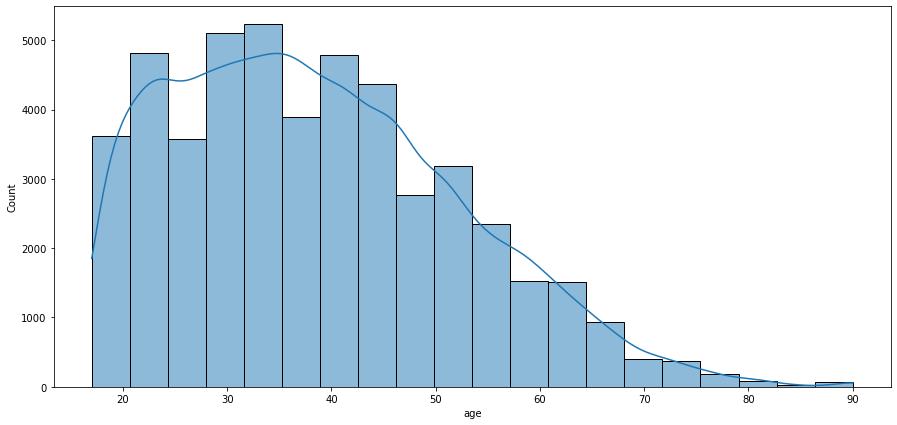

In [152]:
fig,ax=plt.subplots(figsize=(15,7))
sns.histplot(df['age'],kde=True,bins=20,ax=ax)
plt.show()


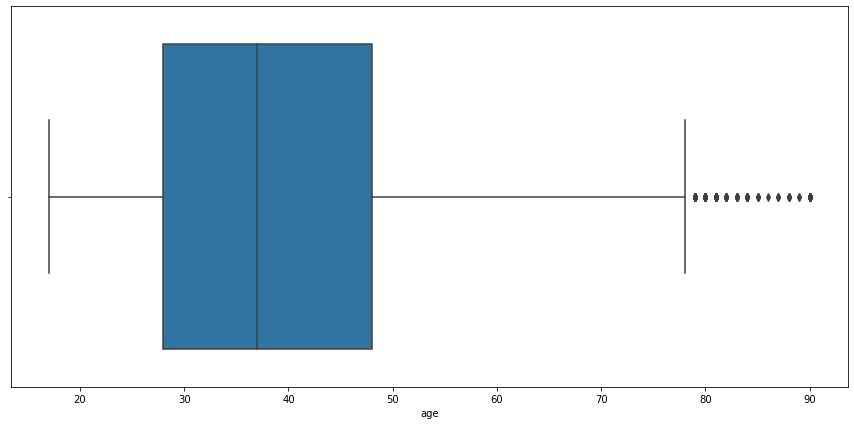

In [153]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(x='age',data=df)
plt.show()

### Capital Gain

<AxesSubplot:xlabel='capital-loss'>

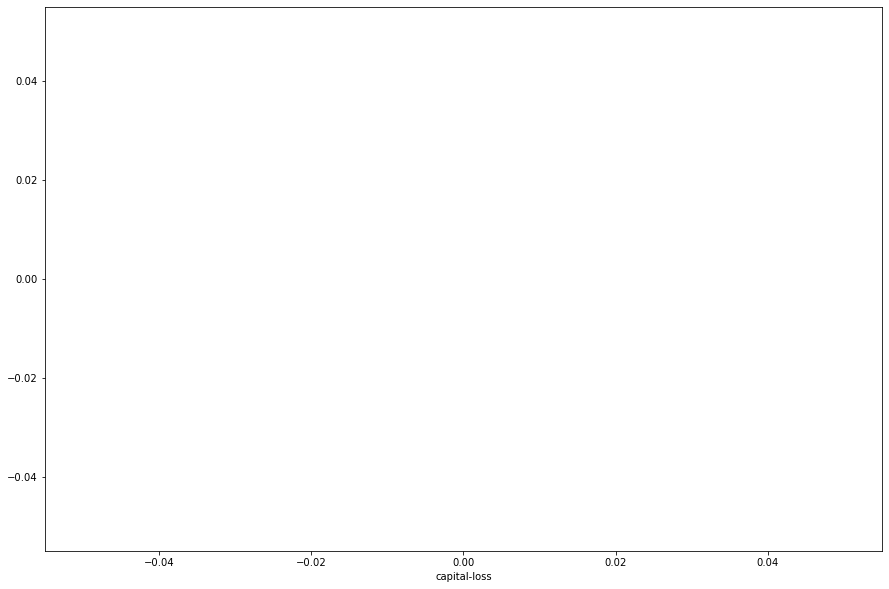

In [154]:
fig,ax=plt.subplots(figsize=(15,10))
sns.scatterplot(x='capital-loss',data=df)

### Function for Categorical Univariate Plot

In [155]:
def draw_catplot(col_name,dataframe):
    print('Number of Categories : ', dataframe[col_name].nunique())
    print('Different Ctaegories in column ' , col_name , ' are :')
    for i in dataframe[col_name].unique():
        print(i)
    if(df[col_name].nunique()>=15):
        fig,ax=plt.subplots(figsize=(22,7))
    else: 
        fig,ax=plt.subplots(figsize=(17,7))
    sns.countplot(x=col_name,data=dataframe)
    ax.bar_label(ax.containers[0])
    plt.show()

### Workclass

Number of Categories :  9
Different Ctaegories in column  workclass  are :
Private
Local-gov
?
Self-emp-not-inc
Federal-gov
State-gov
Self-emp-inc
Without-pay
Never-worked


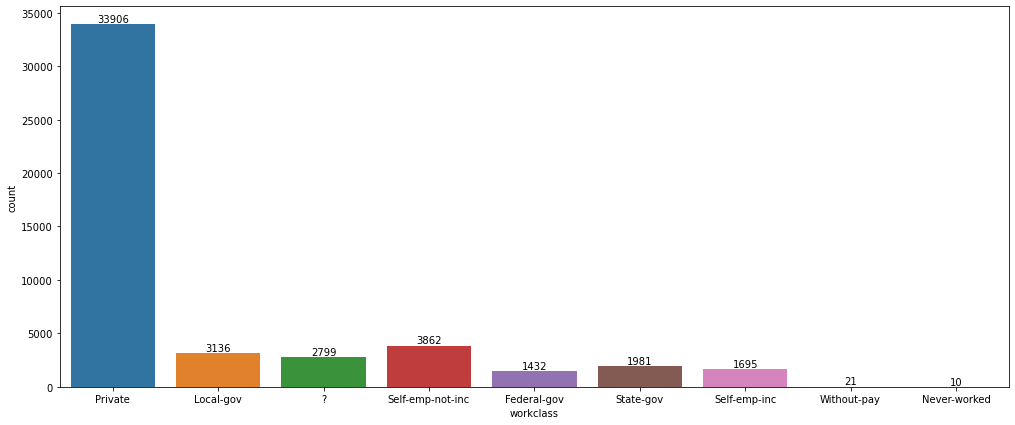

In [156]:
draw_catplot('workclass',df)

### Education

Number of Categories :  16
Different Ctaegories in column  education  are :
11th
HS-grad
Assoc-acdm
Some-college
10th
Prof-school
7th-8th
Bachelors
Masters
Doctorate
5th-6th
Assoc-voc
9th
12th
1st-4th
Preschool


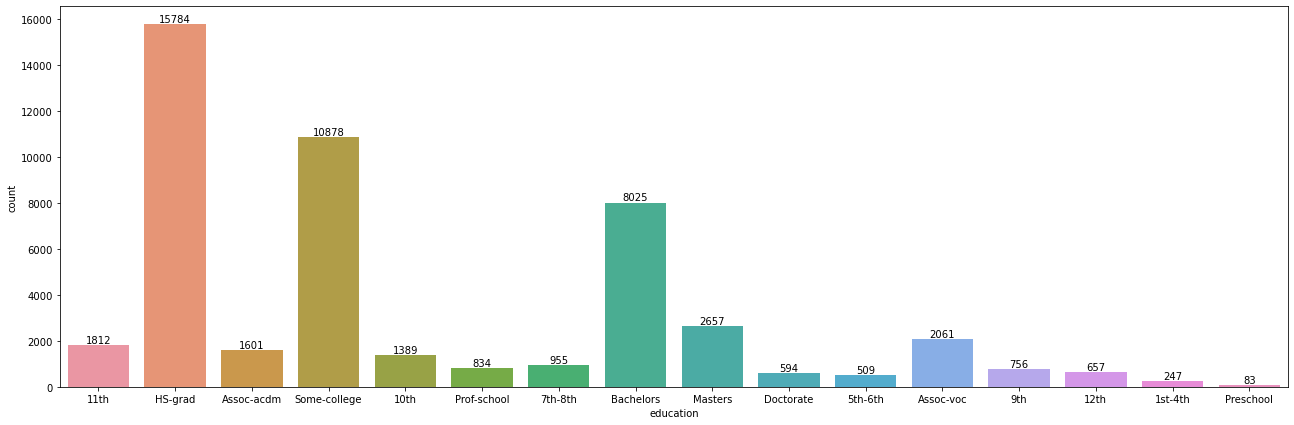

In [157]:
draw_catplot('education',df)

### Educational- Num

Number of Categories :  16
Different Ctaegories in column  educational-num  are :
7
9
12
10
6
15
4
13
14
16
3
11
5
8
2
1


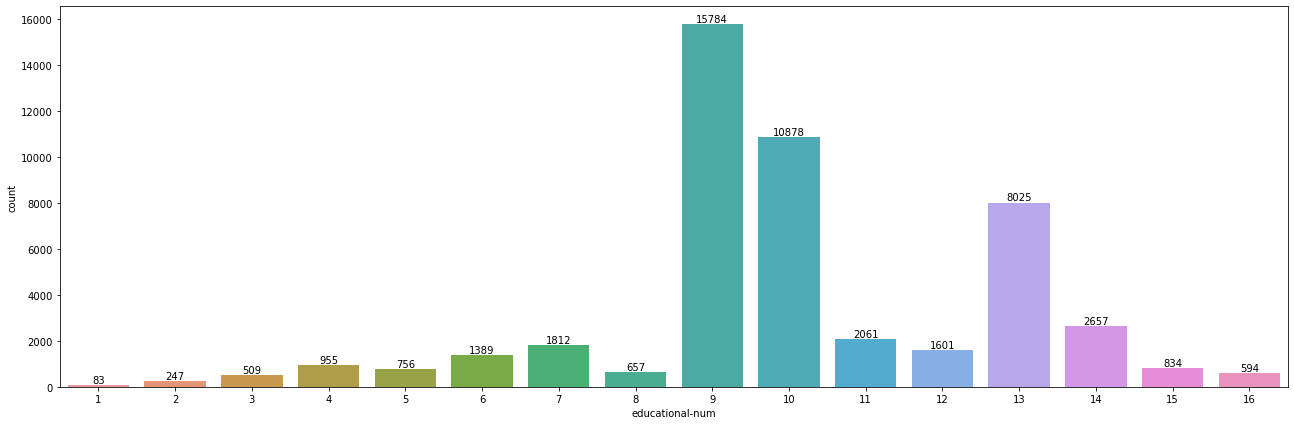

In [158]:
draw_catplot('educational-num',df)

### Marital - Status

Number of Categories :  7
Different Ctaegories in column  marital-status  are :
Never-married
Married-civ-spouse
Widowed
Divorced
Separated
Married-spouse-absent
Married-AF-spouse


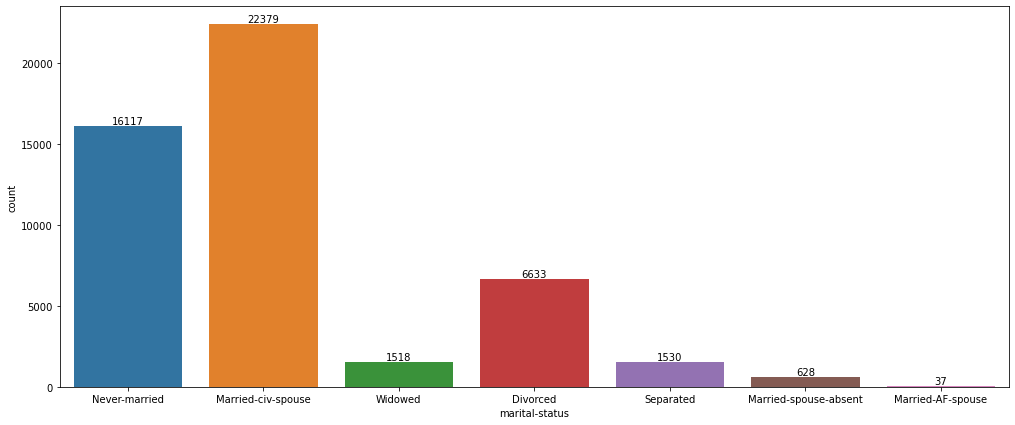

In [159]:
draw_catplot('marital-status',df)

### Occupation

Number of Categories :  15
Different Ctaegories in column  occupation  are :
Machine-op-inspct
Farming-fishing
Protective-serv
?
Other-service
Prof-specialty
Craft-repair
Adm-clerical
Exec-managerial
Tech-support
Sales
Priv-house-serv
Transport-moving
Handlers-cleaners
Armed-Forces


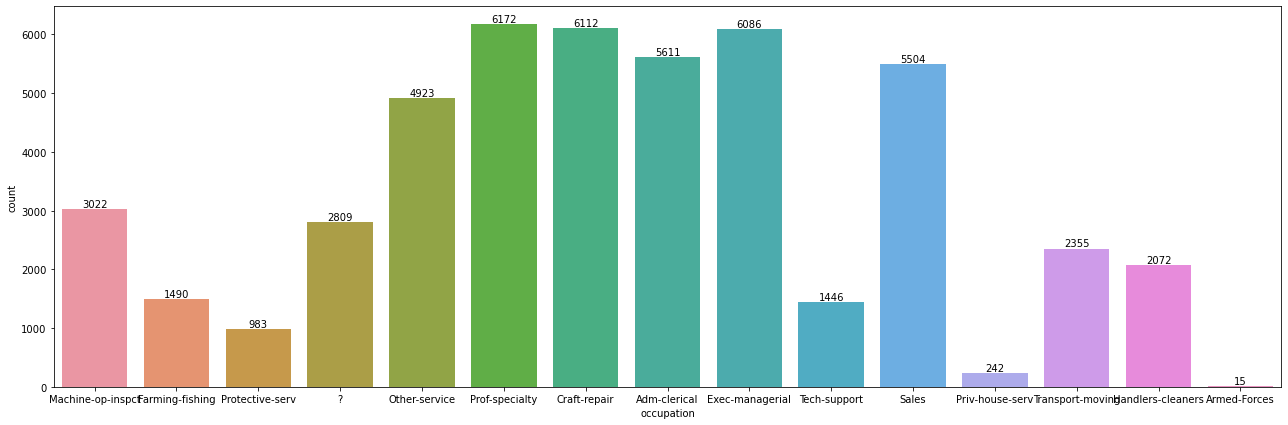

In [160]:
draw_catplot('occupation',df)

### Relationship

Number of Categories :  6
Different Ctaegories in column  relationship  are :
Own-child
Husband
Not-in-family
Unmarried
Wife
Other-relative


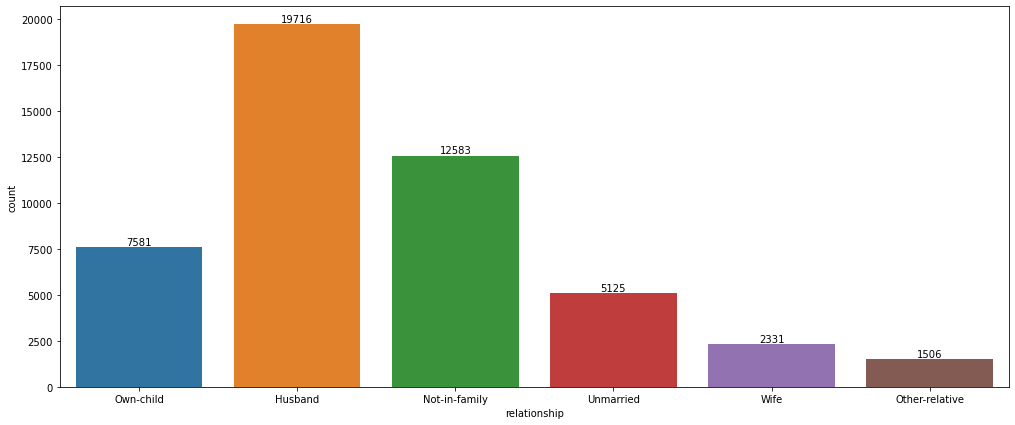

In [161]:
draw_catplot('relationship',df)

### Gender

Number of Categories :  2
Different Ctaegories in column  gender  are :
Male
Female


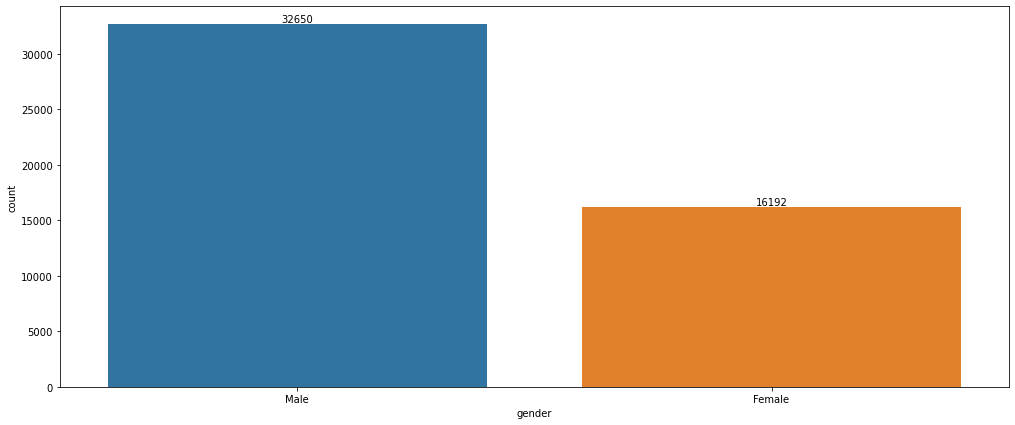

In [162]:
draw_catplot('gender',df)

### Race

Number of Categories :  5
Different Ctaegories in column  race  are :
Black
White
Asian-Pac-Islander
Other
Amer-Indian-Eskimo


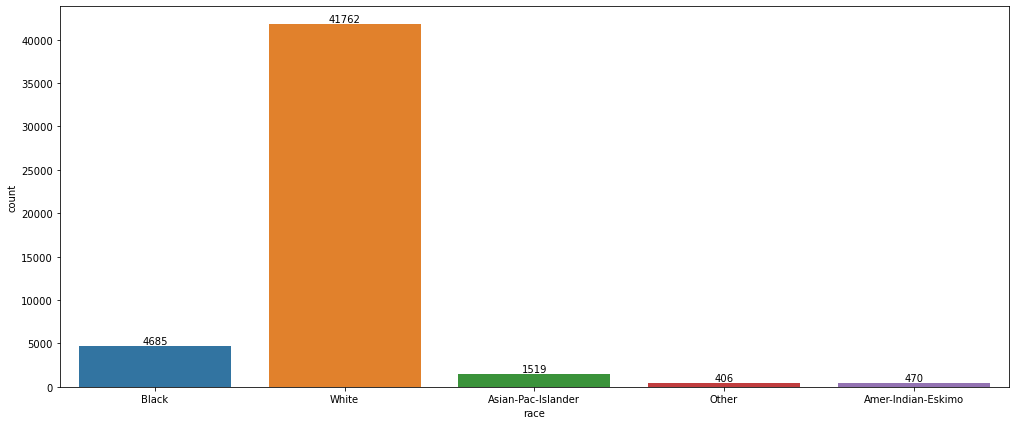

In [163]:
draw_catplot('race',df)

### Native-Country

Number of Categories :  42
Different Ctaegories in column  native-country  are :
United-States
?
Peru
Guatemala
Mexico
Dominican-Republic
Ireland
Germany
Philippines
Thailand
Haiti
El-Salvador
Puerto-Rico
Vietnam
South
Columbia
Japan
India
Cambodia
Poland
Laos
England
Cuba
Taiwan
Italy
Canada
Portugal
China
Nicaragua
Honduras
Iran
Scotland
Jamaica
Ecuador
Yugoslavia
Hungary
Hong
Greece
Trinadad&Tobago
Outlying-US(Guam-USVI-etc)
France
Holand-Netherlands


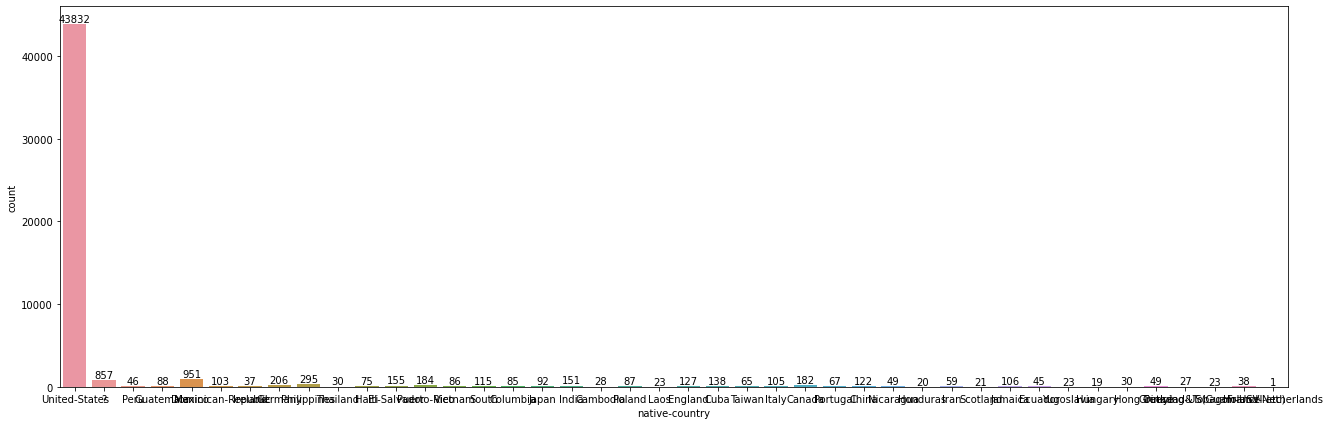

In [164]:
draw_catplot('native-country',df)

### Income

Number of Categories :  2
Different Ctaegories in column  income  are :
<=50K
>50K


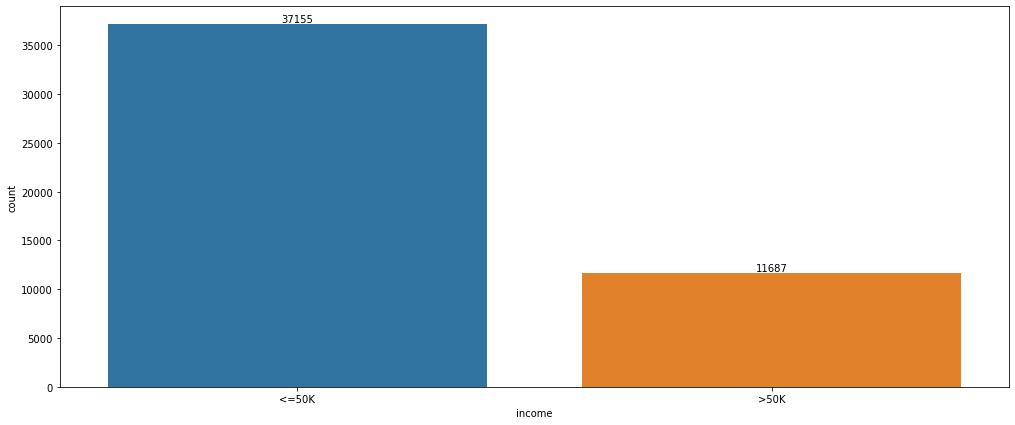

In [165]:
draw_catplot('income',df)

# Bivariate Analysis

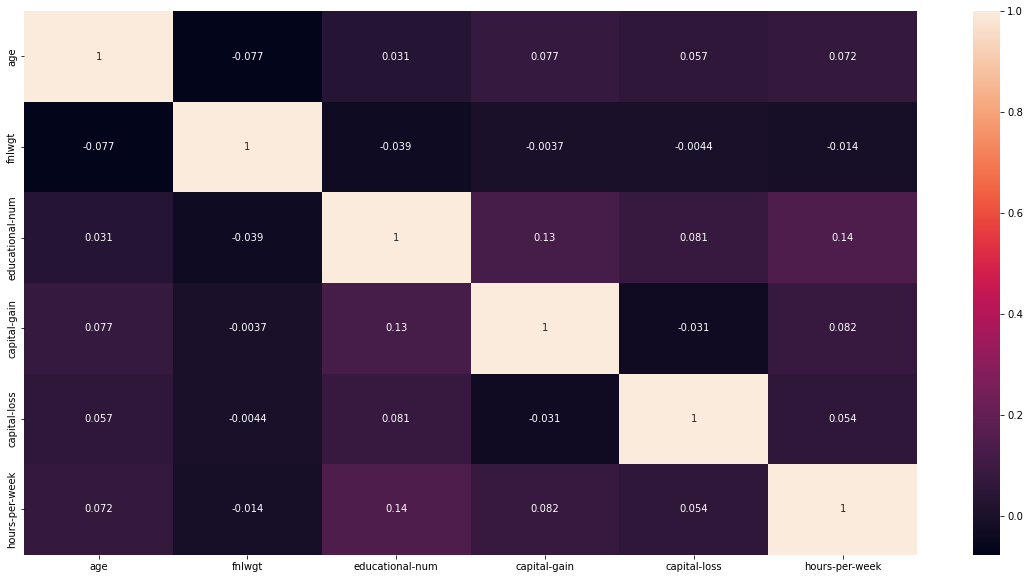

In [166]:
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

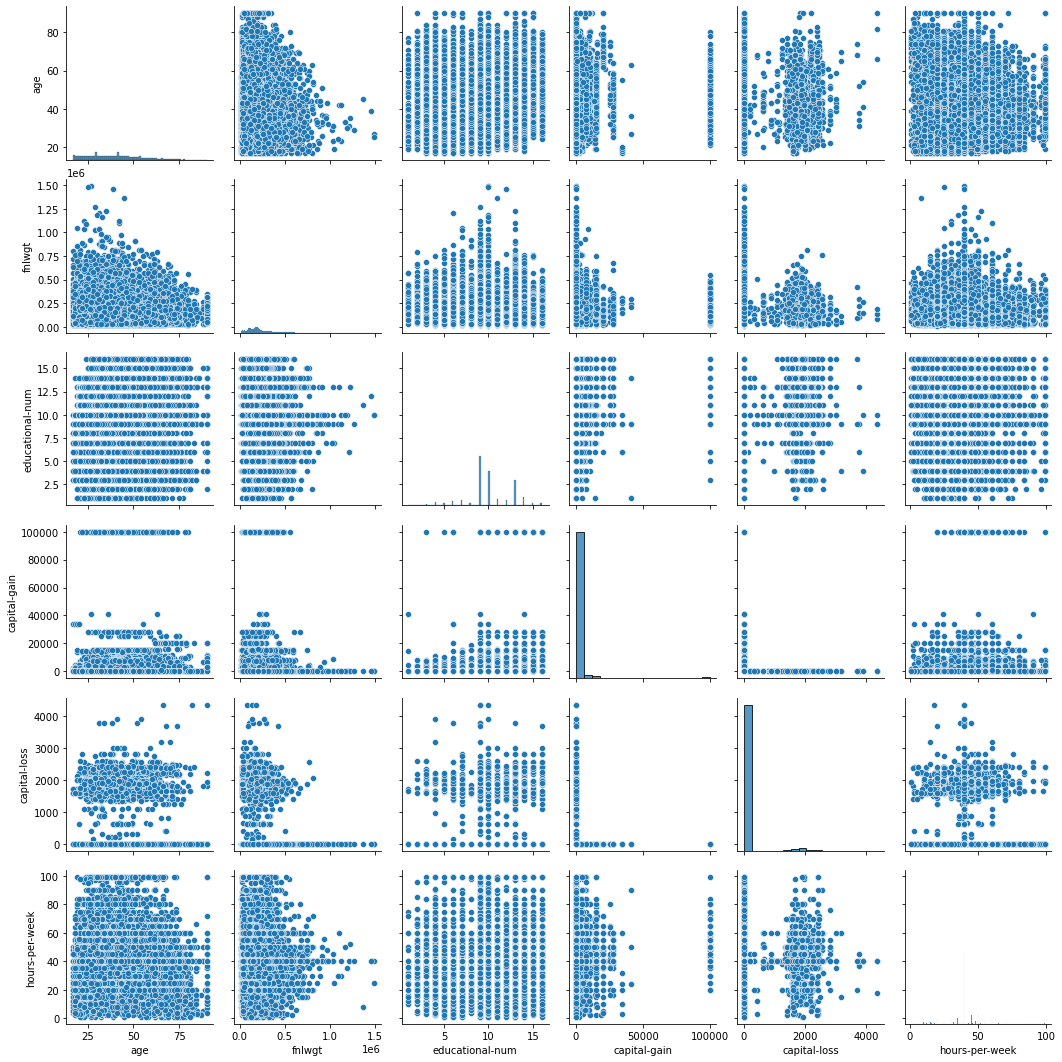

In [167]:
sns.pairplot(df)

# Treating Missing Values

In [168]:
for i in df.columns:
    print(i , df[i].isnull().sum())


age 0
workclass 0
fnlwgt 0
education 0
educational-num 0
marital-status 0
occupation 0
relationship 0
race 0
gender 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 0
income 0


There are no missing values in any column of dataframe.

# Treating Outliers

In [169]:
num_col=[i for i in df.columns if df[i].dtype!='object']
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [170]:
# Function to plot Individual Outliers

def plot_outliers(col_name,dataframe):
    
    plt.title('Outliers in : ' + str(col_name))
    sns.boxplot(x=col_name, data=dataframe)
    plt.show()

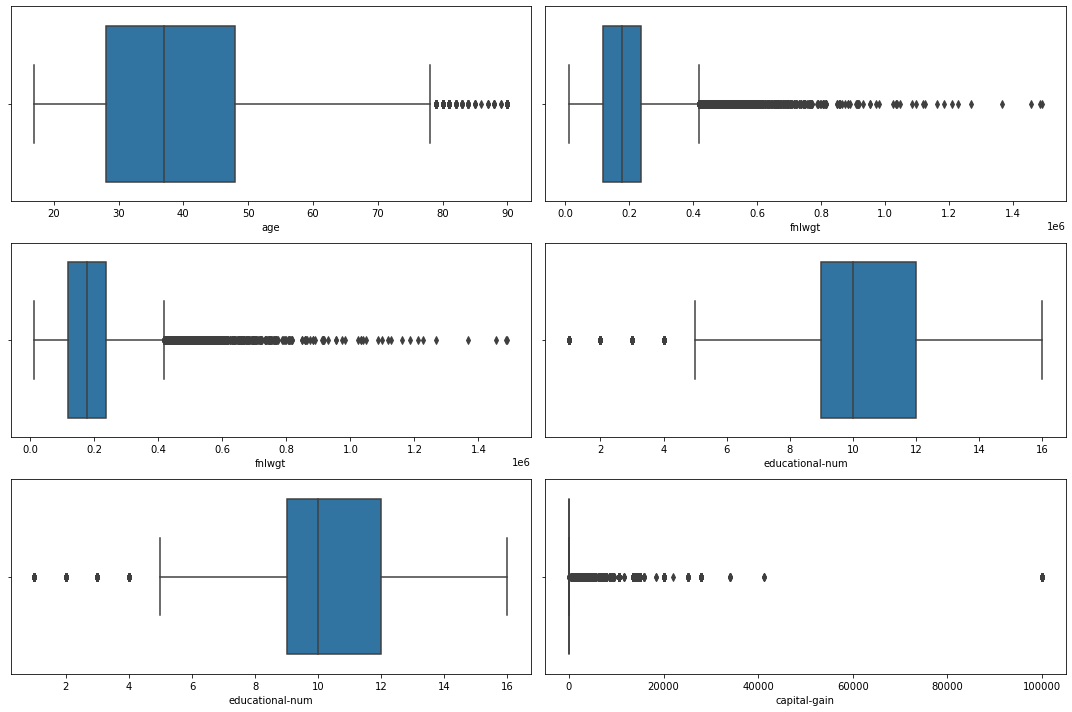

In [171]:

fig,ax=plt.subplots(3,2,figsize=(15,10))
i=0
while i<3:
    
    sns.boxplot(x=num_col[i], data=df,ax=ax[i][0])
    sns.boxplot(x=num_col[i+1], data=df,ax=ax[i][1])
    
    plt.tight_layout()
    i=i+1


In [172]:
df1=df.copy()

In [173]:
df1['age'][df1['age']<50]

0        25
1        38
2        28
3        44
4        18
         ..
48834    32
48836    22
48837    27
48838    40
48840    22
Name: age, Length: 38168, dtype: int64

In [174]:
np.std(df['age'])

13.710369577986553

In [175]:
def remove_outliers(col_name, dataframe):
    mean_col= dataframe[col_name].mean()
    std_dev=np.std(dataframe[col_name])

    lower= mean_col - 3*std_dev
    upper= mean_col + 3*std_dev
    dataframe[col_name][dataframe[col_name]<lower] =lower

    dataframe[col_name][dataframe[col_name]>upper] = upper 
    

In [187]:
def plot_bef_after_outliers(colname):
    fig,ax=plt.subplots(1,2,figsize=(15,7))
    
    sns.boxplot(x=colname, data=df1,ax=ax[0]).set(title = 'Before removing Outliers : ' + str(colname))
    sns.boxplot(x=colname, data=df,ax=ax[1]).set(title = 'After removing Outliers : ' + str(colname))
    plt.show()

    

#### Removing Outlier in AGE Column

In [177]:
remove_outliers('age',df)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]<lower] =lower
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]>upper] = upper


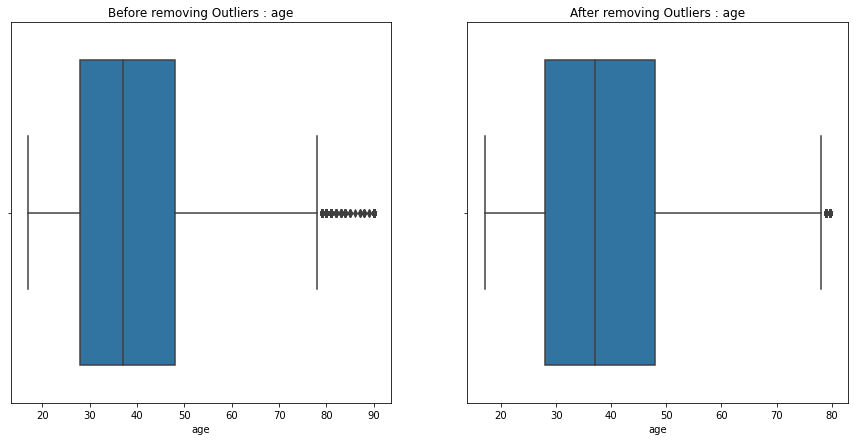

In [188]:
plot_bef_after_outliers('age')

#### Removing Outlier in fnlwgt Column

In [189]:
remove_outliers('fnlwgt',df)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]<lower] =lower
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]>upper] = upper


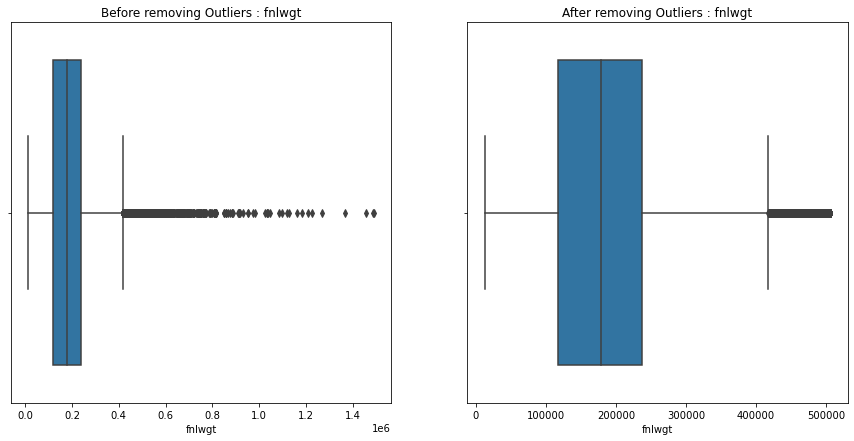

In [190]:
plot_bef_after_outliers('fnlwgt')

In [191]:
num_col

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

#### Removing Outlier in capital-gain Column

In [192]:
remove_outliers('capital-gain',df)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]<lower] =lower
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]>upper] = upper


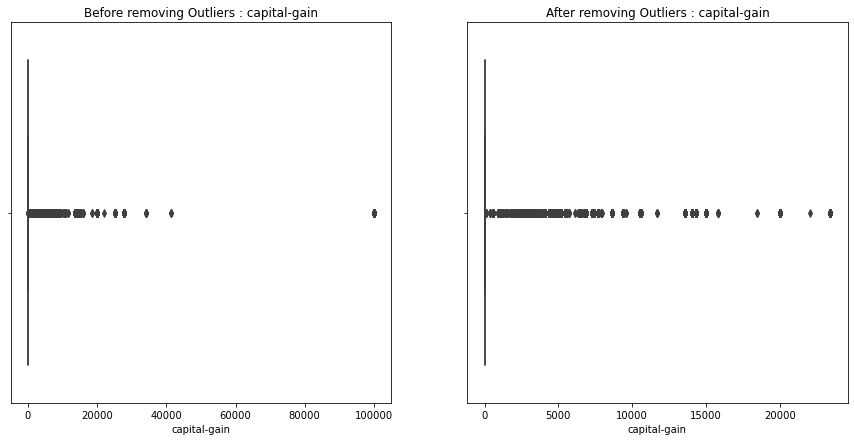

In [193]:
plot_bef_after_outliers('capital-gain')

#### Removing Outlier in capital-loss Column

In [194]:
remove_outliers('capital-loss',df)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]<lower] =lower
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]>upper] = upper


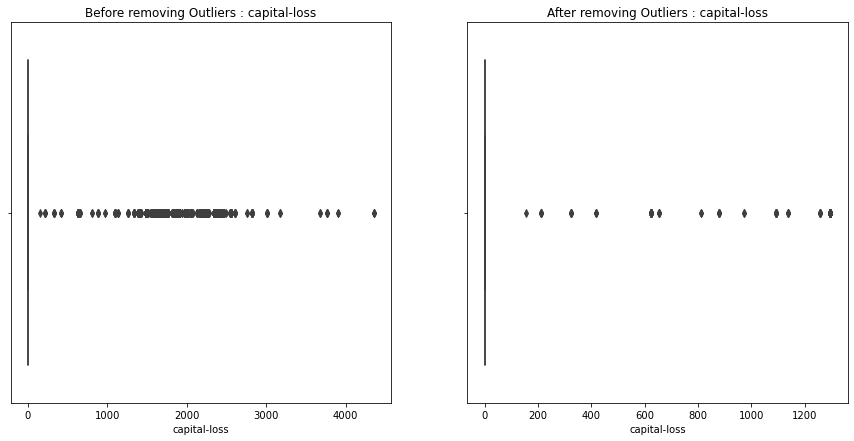

In [195]:
plot_bef_after_outliers('capital-loss')

#### Removing Outlier in hours-per-week Column

In [196]:
remove_outliers('hours-per-week',df)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_9176/3409488848.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[col_name][dataframe[col_name]<lower] =lower


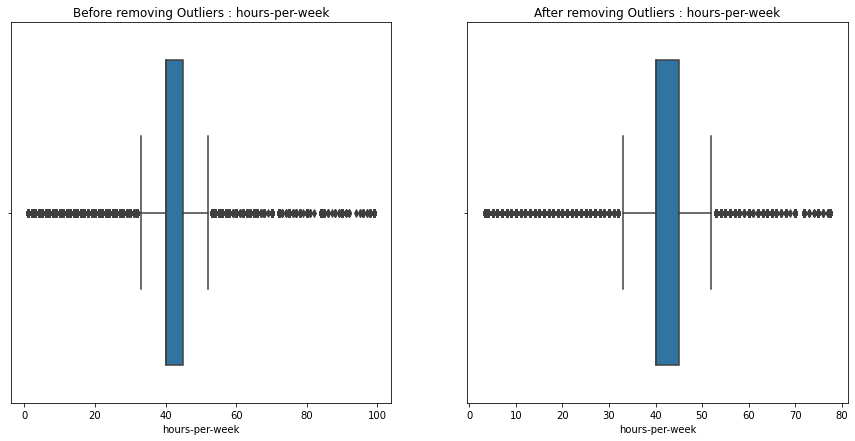

In [197]:
plot_bef_after_outliers('hours-per-week')